<a href="https://colab.research.google.com/github/MohsenMaaleki/Machine-Learning-for-Bone-Tumor-Diagnostics/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [224]:
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Importing Libraries

In [225]:
import time

#work with data
import pandas as pd
from collections import Counter

#linear algebra
import numpy as np
from numpy import pi

#plots
import matplotlib.pyplot as plt
import seaborn as sns

#To build models
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

#Machine Learning Algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



# **About Dataset**
This dataset contains information on bone tumors. The data was collected from patients at the Memorial Sloan Kettering Cancer Center (MSKCC). The dataset includes the following information:

**Patient ID**: A unique identifier for each patient.

**Sex**: The patient's sex.

**Age**: The patient's age at the time of diagnosis.

**Grade**: The grade of the tumor, which is a measure of how aggressive the tumor is.

**Histological type**: The type of tumor, such as osteosarcoma or Ewing sarcoma.

**MSKCC type**: The MSKCC type of the tumor, which is a more specific classification of the tumor.

**Site of primary STS**: The location of the tumor in the bone.

**Status (NED, AWD, D)**: The patient's status, which can be NED (no evidence of disease), AWD (alive with disease), or D (dead).

**Treatment**: The treatment that the patient received, such as surgery, radiation therapy, or chemotherapy.

In [226]:
df = pd.read_csv("/content/drive/MyDrive/Bone_Tumor_Dataset.csv")
df.head()

,Patient ID,Sex,Age,Grade,Histological type,MSKCC type,Site of primary STS,"Status (NED, AWD, D)",Treatment
0,STS_001,Female,63,High,pleiomorphic leiomyosarcoma,Leiomyosarcoma,parascapusular,NED,Radiotherapy + Surgery
1,STS_002,Female,54,Intermediate,pleiomorphic leiomyosarcoma,MFH,left thigh,D,Surgery + Chemotherapy
2,STS_003,Male,22,Intermediate,synovial sarcoma,MFH,right buttock,D,Radiotherapy + Surgery
3,STS_004,Female,54,Intermediate,synovial sarcoma,Leiomyosarcoma,right thigh,NED,Radiotherapy + Surgery
4,STS_005,Male,63,High,pleiomorphic spindle cell undifferentiated,MFH,right parascapusular,AWD,Radiotherapy + Surgery + Chemotherapy


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient ID            500 non-null    object
 1   Sex                   500 non-null    object
 2   Age                   500 non-null    int64 
 3   Grade                 500 non-null    object
 4   Histological type     500 non-null    object
 5   MSKCC type            500 non-null    object
 6   Site of primary STS   500 non-null    object
 7   Status (NED, AWD, D)  500 non-null    object
 8   Treatment             500 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.3+ KB


In [228]:
df.isna().sum()

Patient ID              0
Sex                     0
Age                     0
Grade                   0
Histological type       0
MSKCC type              0
Site of primary STS     0
Status (NED, AWD, D)    0
Treatment               0
dtype: int64

# EDA

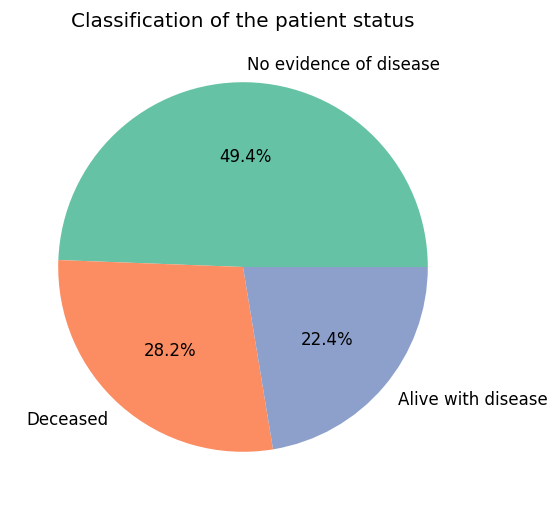

In [229]:
# Calculate the class counts and labels
class_counts = df['Status (NED, AWD, D)'].value_counts()
class_labels = class_counts.index

# Set Seaborn color palette
sns.set_palette("Set2")

# Map the class labels to their descriptions
label_descriptions = {
    'NED': 'No evidence of disease',
    'AWD': 'Alive with disease',
    'D': 'Deceased'
}
class_labels = [label_descriptions[label] for label in class_labels]

# Plotting the pie chart
plt.figure(figsize=(5, 5), dpi=120)

# Create the pie chart
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%')

# Set title
plt.title('Classification of the patient status')

# Display the pie chart
plt.show()

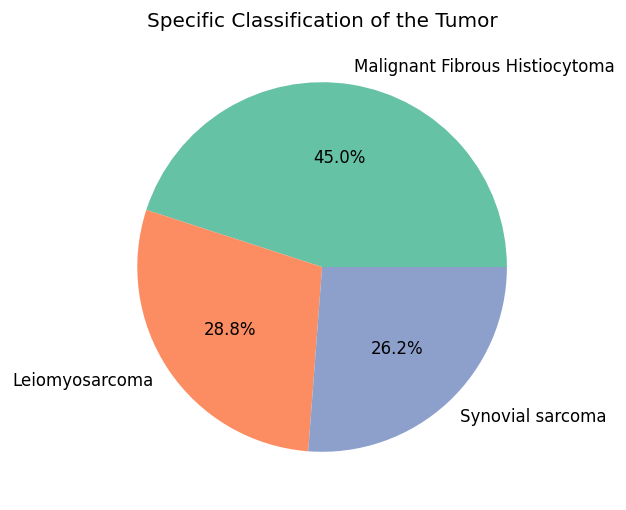

In [230]:
# Calculate the class counts and labels
class_counts = df['MSKCC type'].value_counts()
class_labels = class_counts.index

# Set Seaborn color palette
sns.set_palette("Set2")

# Map the class labels to their descriptions
label_descriptions = {
    'MFH': 'Malignant Fibrous Histiocytoma',
    'Leiomyosarcoma': 'Leiomyosarcoma',
    'Synovial sarcoma' :'Synovial sarcoma'
}
class_labels = [label_descriptions[label] for label in class_labels]

# Plotting the pie chart
plt.figure(figsize=(5, 5), dpi=120)

# Create the pie chart
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%')

# Set title
plt.title('Specific Classification of the Tumor')

# Display the pie chart
plt.show()

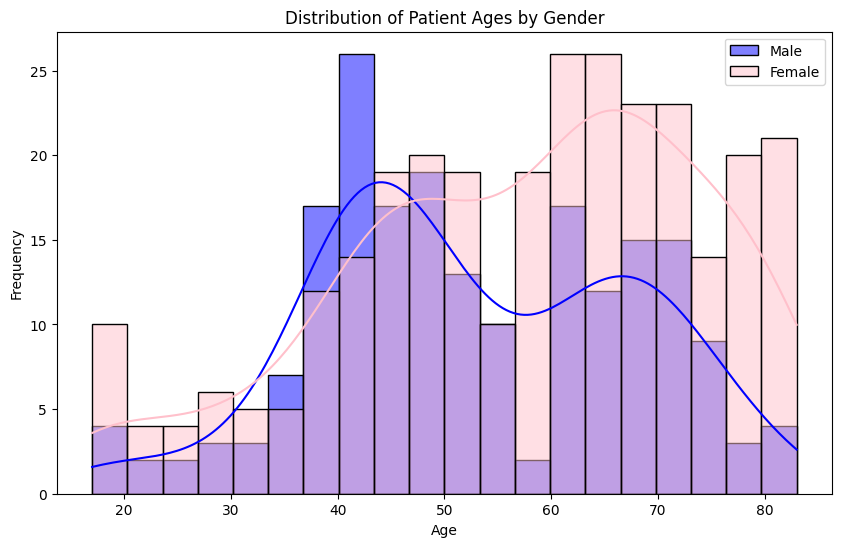

In [231]:
# Separate the data by gender
male_data = df[df['Sex'] == 'Male']
female_data = df[df['Sex'] == 'Female']

#histograms for male and female patients
plt.figure(figsize=(10, 6))
sns.histplot(data=male_data, x='Age', bins=20, kde=True, color='blue', label='Male')
sns.histplot(data=female_data, x='Age', bins=20, kde=True, color='pink', label='Female')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Patient Ages by Gender')
plt.legend()
plt.show()

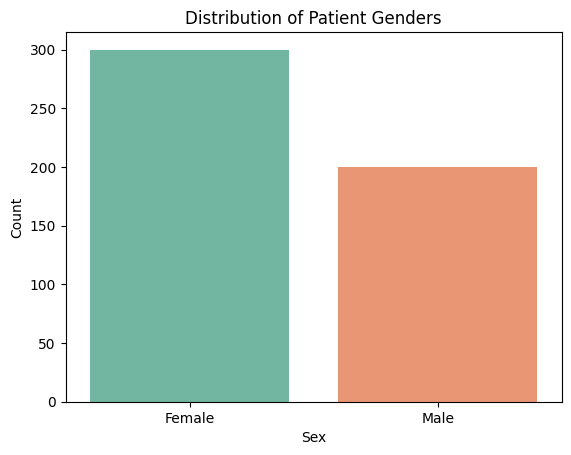

In [232]:
#bar chart of patient genders
sns.countplot(data=df, x='Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Patient Genders')
plt.show()

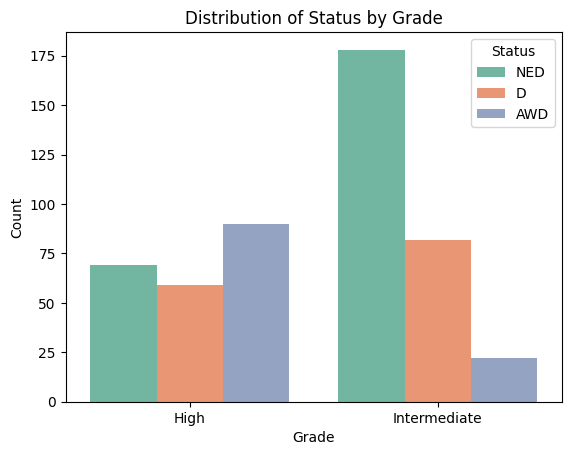

In [233]:
# count plot of 'Grade' against 'Status (NED, AWD, D)'
sns.countplot(data=df, x='Grade', hue='Status (NED, AWD, D)')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Status by Grade')
plt.legend(title='Status')
plt.show()

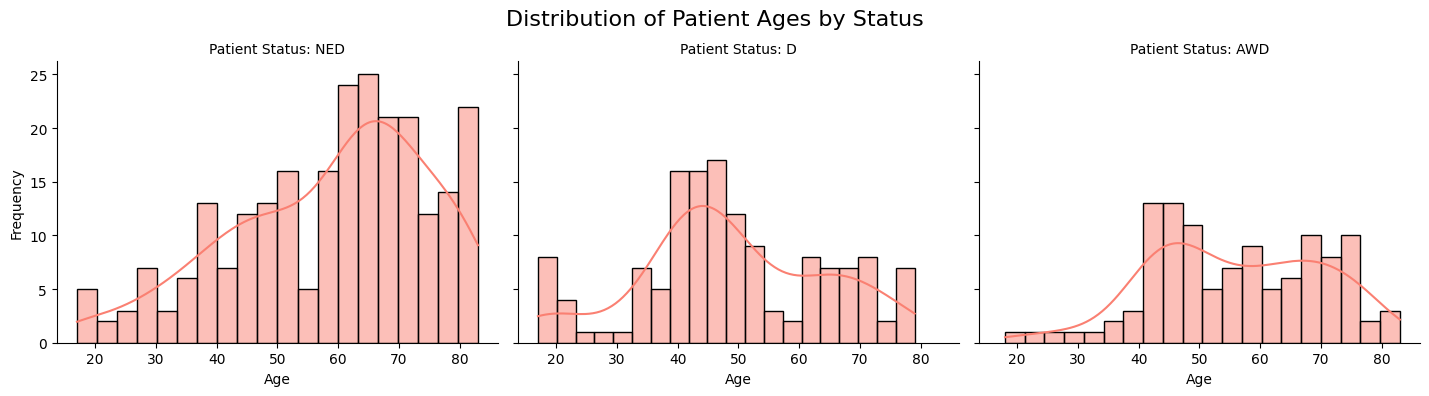

In [234]:
# facet grid of histograms for 'Age' based on 'Status (NED, AWD, D)'
g = sns.FacetGrid(df, col='Status (NED, AWD, D)', height=4, aspect=1.2, margin_titles=True)

# Customize the appearance
g.map(sns.histplot, 'Age', bins=20, kde=True, color='salmon')
g.set_axis_labels('Age', 'Frequency')
g.set_titles(col_template="Patient Status: {col_name}")

# Add a suptitle for the entire grid
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Patient Ages by Status', fontsize=16)

# Show the plot
plt.show()


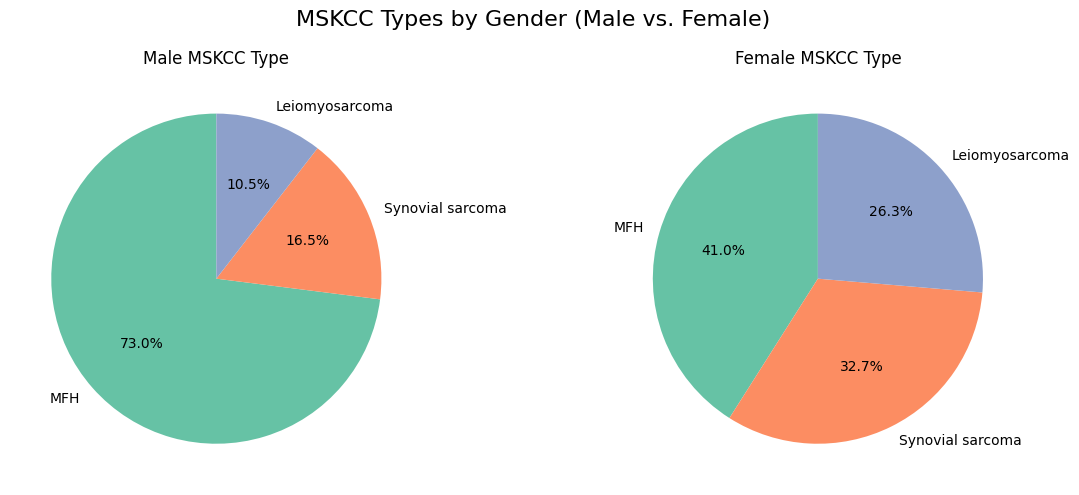

In [235]:
#MSKCC Types by Gender
# Filter the data for Male and Female
male_data = df[df['Sex'] == 'Male']
female_data = df[df['Sex'] == 'Female']

# Calculate MSKCC type counts for Male and Female
male_mskcc_counts = male_data['MSKCC type'].value_counts()
female_mskcc_counts = female_data['MSKCC type'].value_counts()

# Categories and color palette
categories = male_mskcc_counts.index
blue_palette = ['#16558F', '#0583D2', '#61B0B7']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Male MSKCC Type
sns.set_palette(sns.color_palette(blue_palette))
axes[0].pie(male_mskcc_counts, labels=categories, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Male MSKCC Type')

# Plot Female MSKCC Type
sns.set_palette(sns.color_palette(blue_palette))
axes[1].pie(female_mskcc_counts, labels=categories, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Female MSKCC Type')

# Set a title for the entire plot
plt.suptitle('MSKCC Types by Gender (Male vs. Female)', fontsize=16)

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

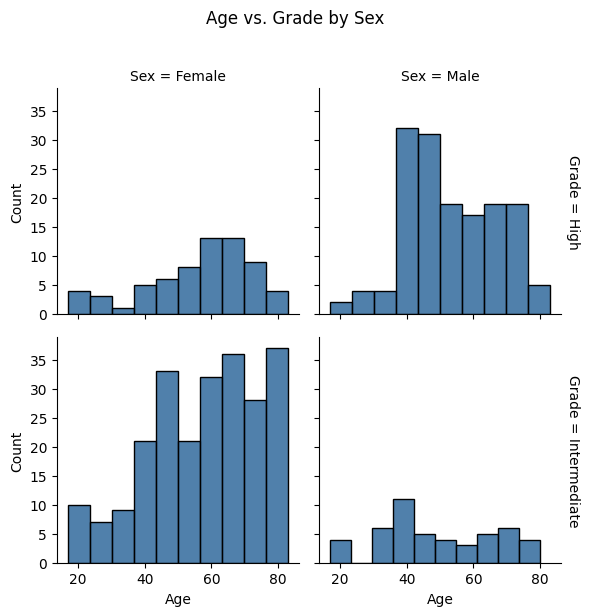

In [236]:
#facet grid for 'Age' vs. 'Grade' with different facets for 'Sex'
g = sns.FacetGrid(df, col='Sex', row='Grade', margin_titles=True)
g.map(sns.histplot, 'Age', bins=10)
g.set_axis_labels('Age', 'Count')
g.fig.suptitle('Age vs. Grade by Sex', y=1.02)
plt.tight_layout()
plt.show()

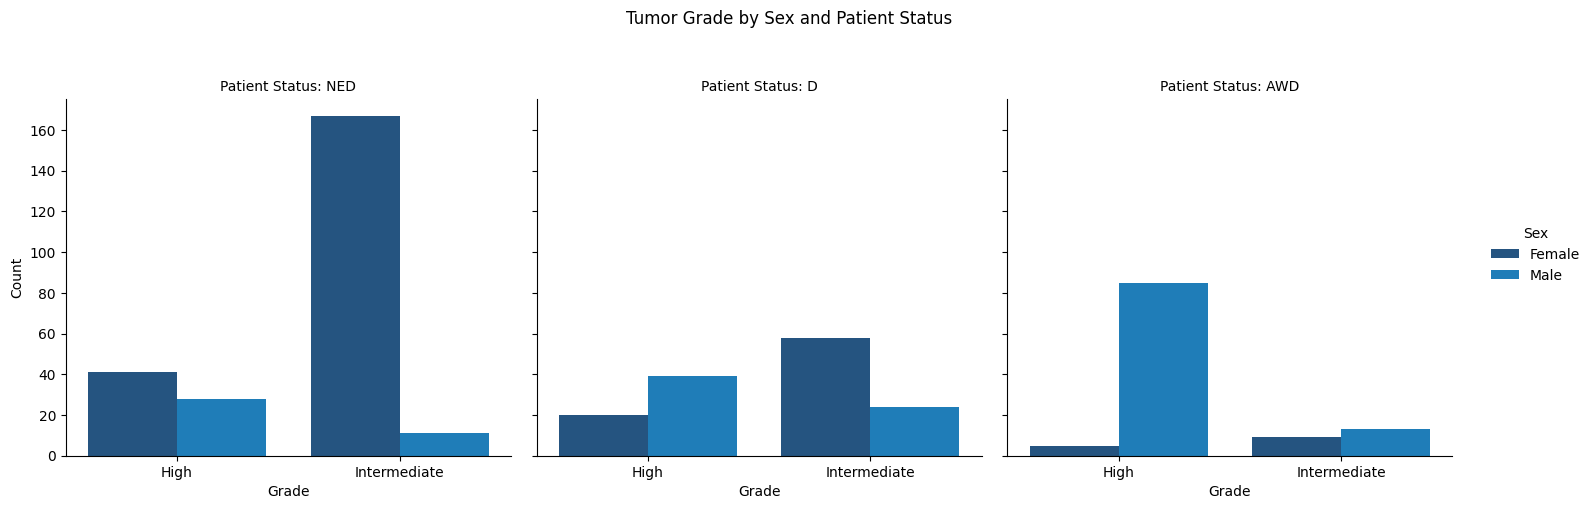

In [237]:
#clustered bar plots for different 'Status (NED, AWD, D)'
g = sns.catplot(data=df, x='Grade', hue='Sex', col='Status (NED, AWD, D)', kind='count')
g.set_axis_labels('Grade', 'Count')
g.set_titles(col_template="Patient Status: {col_name}")

# Set the title at the top
g.fig.suptitle('Tumor Grade by Sex and Patient Status', y=1.02)

# Adjust spacing
g.tight_layout(pad=1.5)
plt.show()

# Machine Learning

### Preprocessing data

In [238]:
# Get the number of unique values in each column
num_unique_values = df.nunique()
# Print the number of unique values in each column
print("Number of unique values in each column:")
print(num_unique_values)

Number of unique values in each column:
Patient ID              500
Sex                       2
Age                      65
Grade                     2
Histological type        13
MSKCC type                3
Site of primary STS       7
Status (NED, AWD, D)      3
Treatment                 3
dtype: int64


In [239]:
# Get the frequency of each unique value in each column
value_counts = {}
for column in df.columns:
    value_counts[column] = df[column].value_counts()
# Print the frequency of each unique value in each column
print("\nFrequency of each unique value in each column:")
for column, counts in value_counts.items():
    print(f"Column: {column}")
    print(counts)
    print("\n")


Frequency of each unique value in each column:
Column: Patient ID
STS_001    1
STS_330    1
STS_343    1
STS_342    1
STS_341    1
          ..
STS_162    1
STS_161    1
STS_160    1
STS_159    1
STS_500    1
Name: Patient ID, Length: 500, dtype: int64


Column: Sex
Female    300
Male      200
Name: Sex, dtype: int64


Column: Age
63    17
41    17
72    17
45    16
66    16
      ..
23     1
19     1
26     1
29     1
27     1
Name: Age, Length: 65, dtype: int64


Column: Grade
Intermediate    282
High            218
Name: Grade, dtype: int64


Column: Histological type
pleiomorphic leiomyosarcoma                   104
synovial sarcoma                               73
leiomyosarcoma                                 43
myxofibrosarcoma                               40
undifferentiated - pleiomorphic                34
sclerosing epithelioid fibrosarcoma            33
pleiomorphic spindle cell undifferentiated     29
malignant solitary fibrous tumor               29
undifferentiated pleo

In [240]:
# Drop the 'Patient ID' column
df = df.drop("Patient ID", axis=1)

In [241]:
# Encode 'Sex' column
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [242]:
# Perform one-hot encoding on other categorical columns
categorical_cols = ['Grade', 'Histological type', 'MSKCC type', 'Site of primary STS', 'Treatment']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [243]:
df['Status (NED, AWD, D)'] = label_encoder.fit_transform(df['Status (NED, AWD, D)'])

In [244]:
df.head()

,Sex,Age,"Status (NED, AWD, D)",Grade_Intermediate,Histological type_leiomyosarcoma,Histological type_malignant solitary fibrous tumor,Histological type_myxofibrosarcoma,Histological type_myxoid fibrosarcoma,Histological type_pleiomorphic leiomyosarcoma,Histological type_pleiomorphic spindle cell undifferentiated,...,MSKCC type_MFH,MSKCC type_Synovial sarcoma,Site of primary STS_left buttock,Site of primary STS_left thigh,Site of primary STS_parascapusular,Site of primary STS_right buttock,Site of primary STS_right parascapusular,Site of primary STS_right thigh,Treatment_Radiotherapy + Surgery + Chemotherapy,Treatment_Surgery + Chemotherapy
0,0,63,2,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,54,1,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
2,1,22,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,54,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,63,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 26 columns):
 #   Column                                                        Non-Null Count  Dtype
---  ------                                                        --------------  -----
 0   Sex                                                           500 non-null    int64
 1   Age                                                           500 non-null    int64
 2   Status (NED, AWD, D)                                          500 non-null    int64
 3   Grade_Intermediate                                            500 non-null    uint8
 4   Histological type_leiomyosarcoma                              500 non-null    uint8
 5   Histological type_malignant solitary fibrous tumor            500 non-null    uint8
 6   Histological type_myxofibrosarcoma                            500 non-null    uint8
 7   Histological type_myxoid fibrosarcoma                         500 non-null    uint8
 8   

In [246]:
# Split the data into features (X) and the target variable (y)
X = df.drop("Status (NED, AWD, D)", axis=1)
y = df["Status (NED, AWD, D)"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [247]:
X_train.shape

(400, 25)

###Machine Learning Algorithm

In [248]:
#1-Naive Bayes classifier
naive_bayes = GaussianNB()
#-------------------------------------------------------------------------------
#2-Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
#-------------------------------------------------------------------------------
#3-Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
#-------------------------------------------------------------------------------
#4-Create an instance of LogisticRegression
max_iter = 100000
logreg = LogisticRegression(solver='saga', max_iter=max_iter)
#-------------------------------------------------------------------------------
#5-Support Vector Machine
# Create an instance of LinearSVC
svc = LinearSVC(multi_class='ovr', max_iter=max_iter, C=0.1)
#-------------------------------------------------------------------------------
#6-Non-parametric method: k-nearest neighbors
# Create KNN classifier object
Euclidean_knn = KNeighborsClassifier(n_neighbors=3)
manhattan_knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

In [249]:
def evaluate_algorithms(algorithms, x_train, y_train, x_test, y_test):
    eval_metrics = {}
    execution_times = {}

    for algo_name, algo in algorithms.items():
        # Start timing
        start_time = time.time()

        # Fit the model to the training data
        algo.fit(x_train, y_train)

        # Make predictions on the test data
        y_pred = algo.predict(x_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Calculate confusion matrix and classification report
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        # Store evaluation metrics and additional information in the dictionary
        eval_metrics[algo_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': cm,
            'Classification Report': report
        }

        # Calculate execution time
        end_time = time.time()
        execution_time = end_time - start_time

        # Store execution time in the dictionary
        execution_times[algo_name] = execution_time

    return eval_metrics, execution_times


In [250]:
algorithms = {
    'GNB': naive_bayes,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'Logistic Regression': logreg,
    'LinearSVC': svc,
    'KNN Euclidean': Euclidean_knn,
    'KNN Manhattan': manhattan_knn
}

eval_metrics, execution_times = evaluate_algorithms(algorithms, X_train, y_train, X_test, y_test)

# Convert the execution times dictionary into a list of tuples
algo_names, execution_times = zip(*execution_times.items())


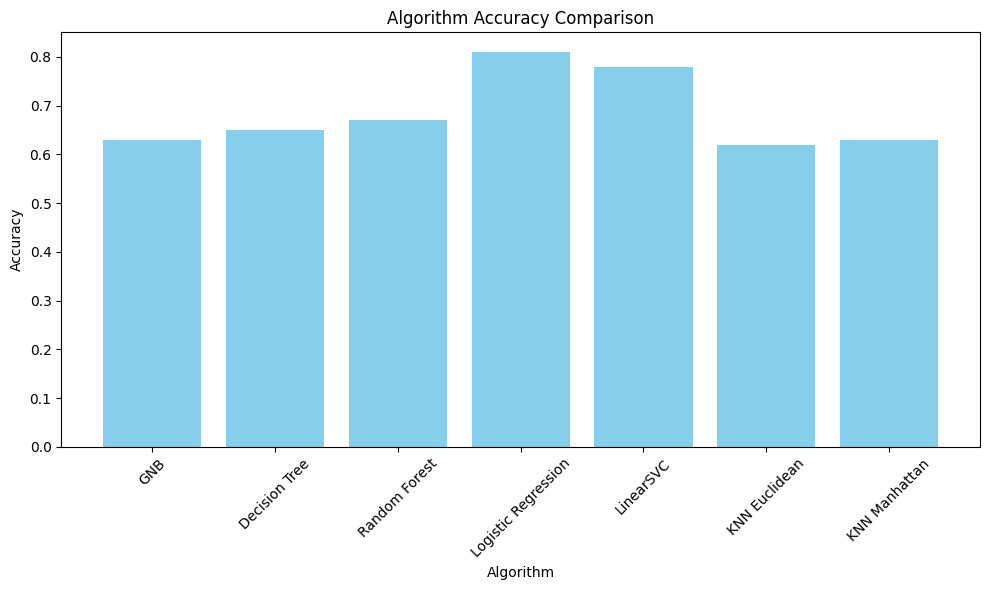

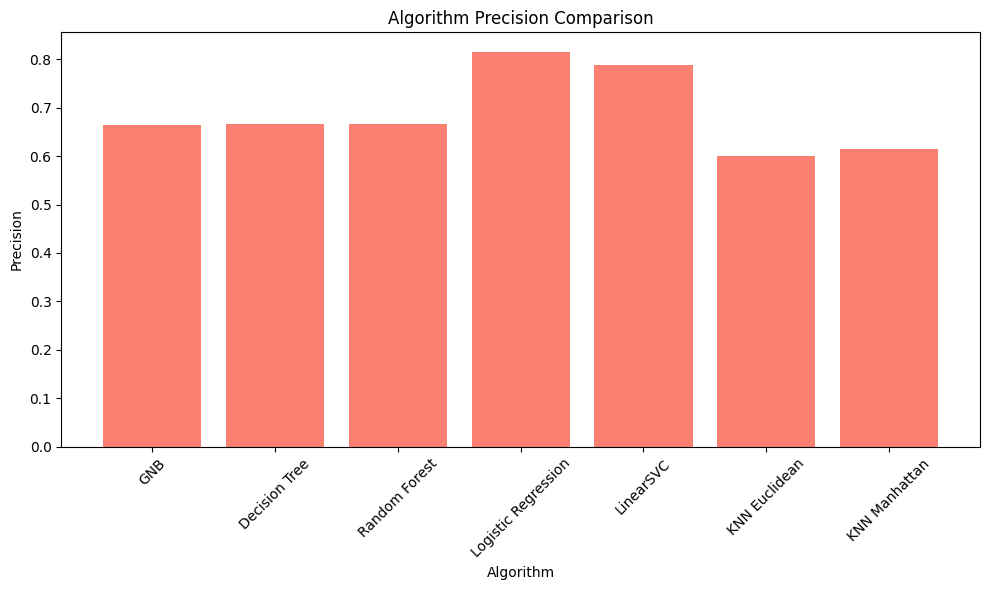

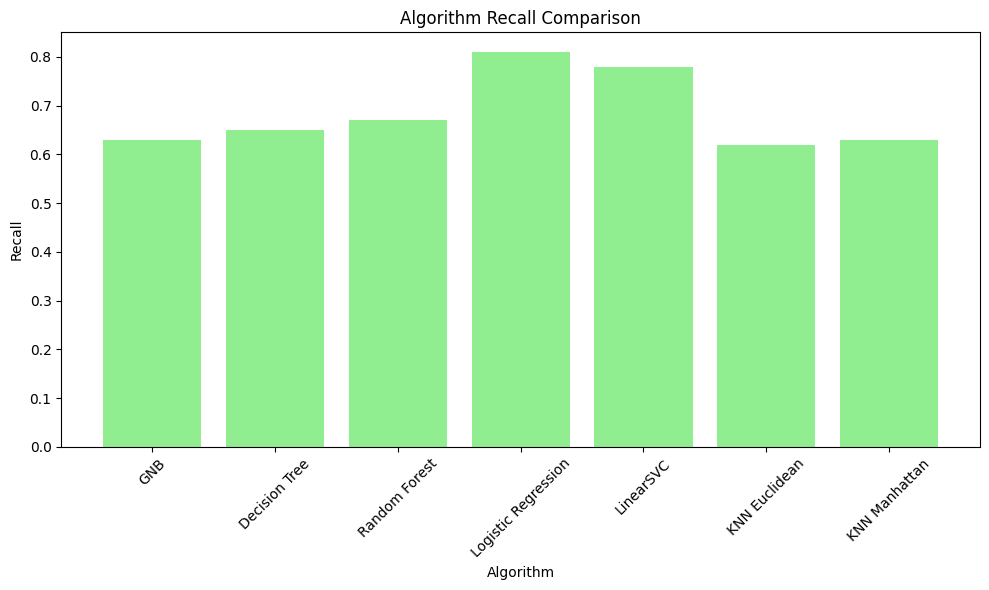

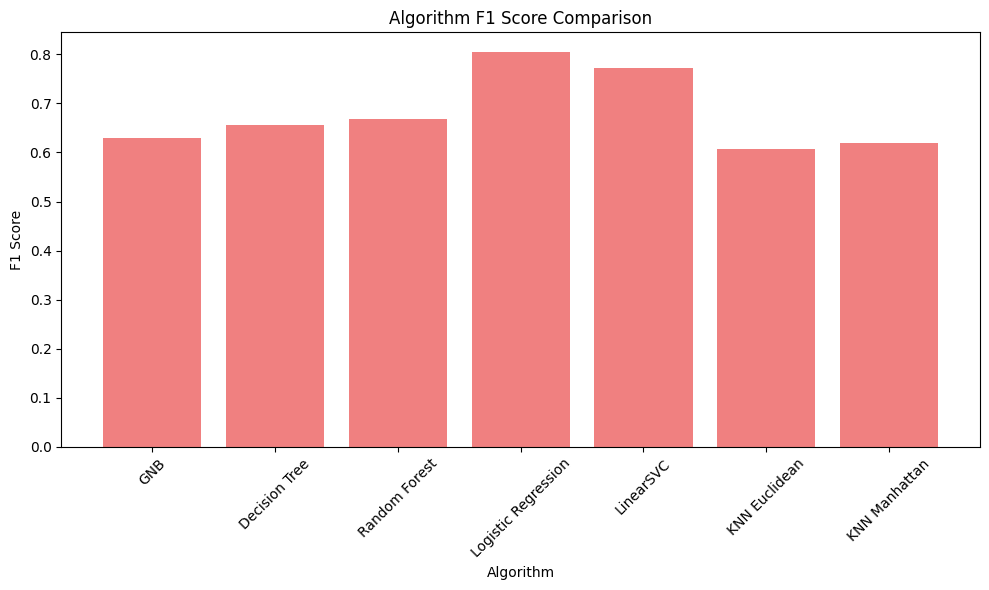

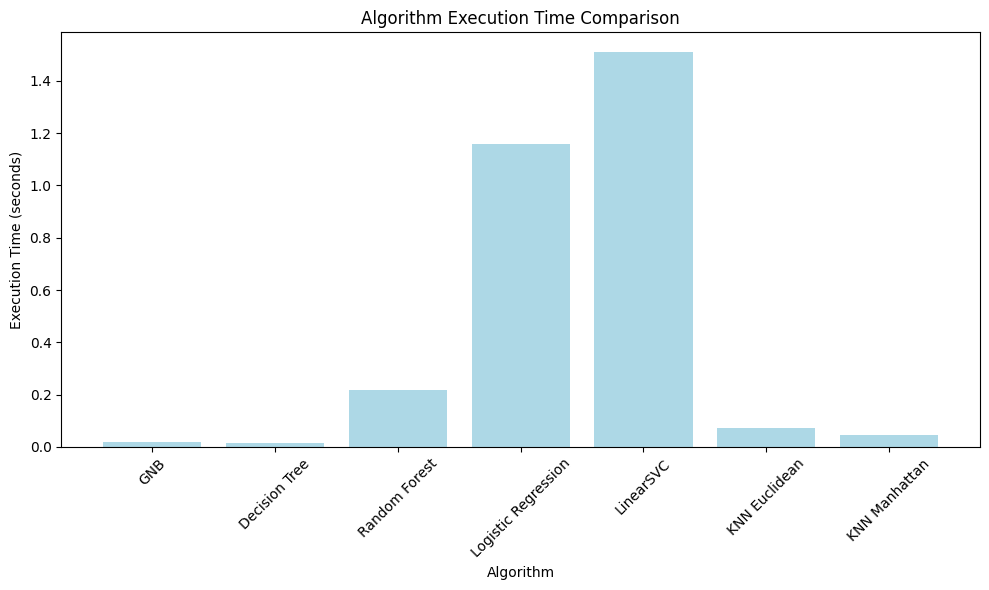

In [251]:
# Extract evaluation metrics from the eval_metrics dictionary
accuracy_values = [eval_metrics[algo]['Accuracy'] for algo in algo_names]
precision_values = [eval_metrics[algo]['Precision'] for algo in algo_names]
recall_values = [eval_metrics[algo]['Recall'] for algo in algo_names]
f1_values = [eval_metrics[algo]['F1 Score'] for algo in algo_names]

# bar plot for accuracy
plt.figure(figsize=(10, 6))
plt.bar(algo_names, accuracy_values, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Algorithm Accuracy Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#bar plot for precision
plt.figure(figsize=(10, 6))
plt.bar(algo_names, precision_values, color='salmon')
plt.xlabel('Algorithm')
plt.ylabel('Precision')
plt.title('Algorithm Precision Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#bar plot for recall
plt.figure(figsize=(10, 6))
plt.bar(algo_names, recall_values, color='lightgreen')
plt.xlabel('Algorithm')
plt.ylabel('Recall')
plt.title('Algorithm Recall Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#bar plot for F1 score
plt.figure(figsize=(10, 6))
plt.bar(algo_names, f1_values, color='lightcoral')
plt.xlabel('Algorithm')
plt.ylabel('F1 Score')
plt.title('Algorithm F1 Score Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#bar plot for execution times
plt.figure(figsize=(10, 6))
plt.bar(algo_names, execution_times, color='lightblue')
plt.xlabel('Algorithm')
plt.ylabel('Execution Time (seconds)')
plt.title('Algorithm Execution Time Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


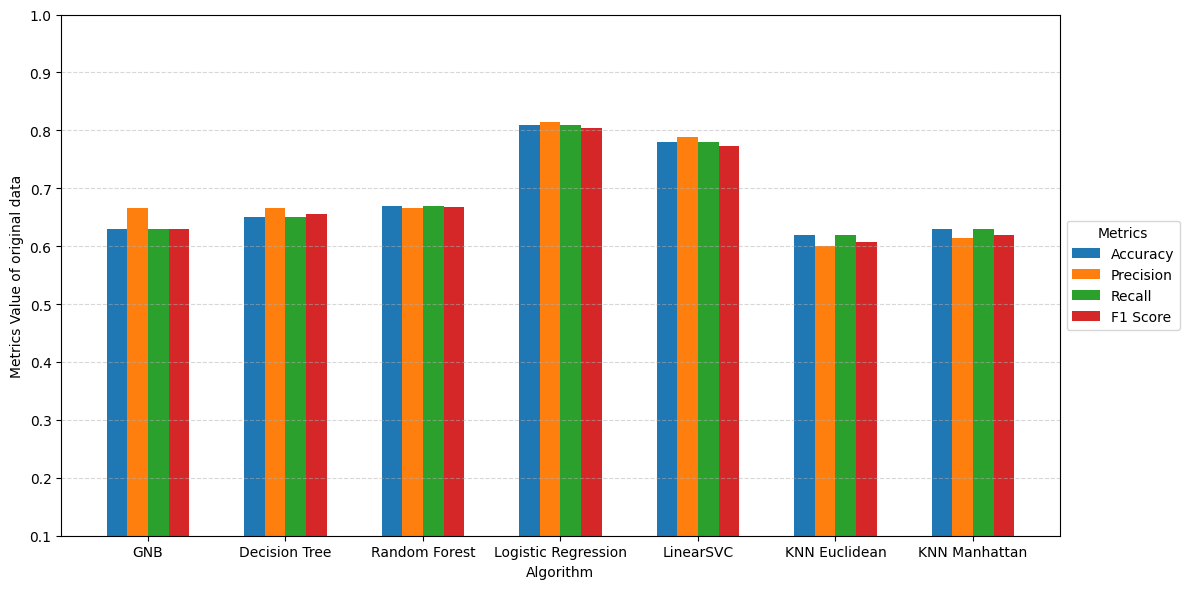

In [252]:
keys = list(eval_metrics.keys())
values = list(eval_metrics.values())

#figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
positions = np.arange(len(keys))

# Define the color palette
colors = sns.color_palette("tab10")

# Define the metrics to plot
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Loop through each metric and create bars
for i, metric in enumerate(metrics_to_plot):
    ax.bar(positions + i * bar_width, [value[metric] for value in values], width=bar_width, color=colors[i], label=metric)

# Set x-axis labels and tick positions
ax.set_xticks(positions + (len(metrics_to_plot) - 1) * bar_width / 2)
ax.set_xticklabels(keys, rotation=0, ha='center')
ax.set_xlabel("Algorithm")

# Set y-axis label
ax.set_ylabel("Metrics Value of original data")

# Set y-axis range and ticks
ax.set_ylim(0.80, 1.00)
ax.set_yticks(np.arange(0.10, 1.01, 0.10))

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add a legend on the left side
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Metrics")

plt.tight_layout()
plt.show()


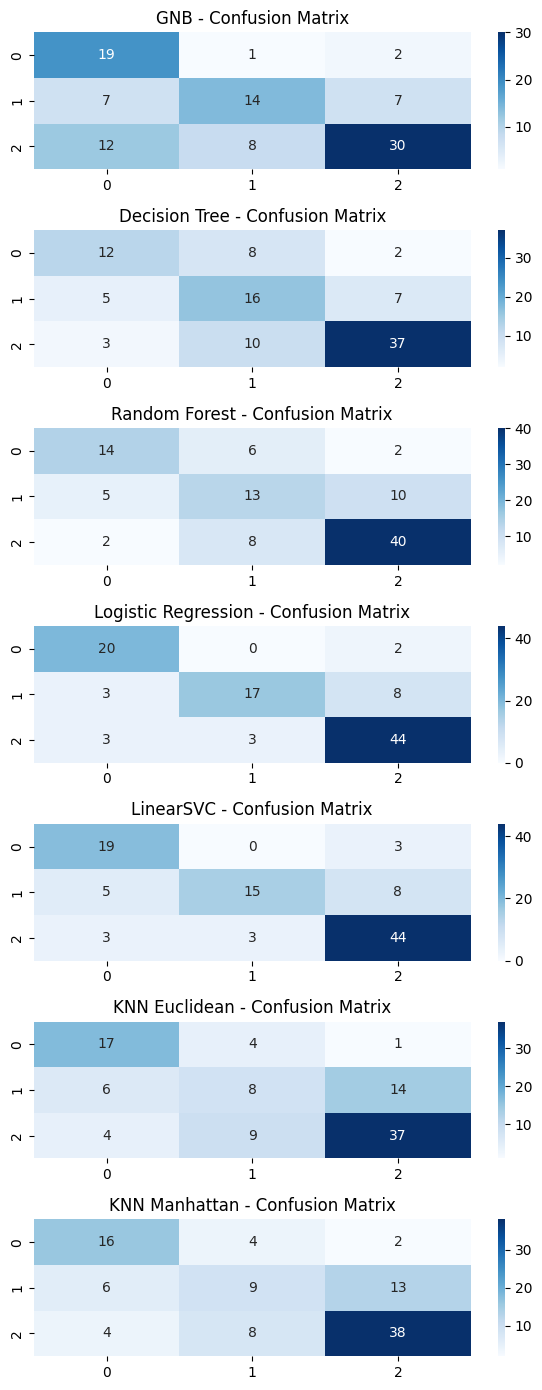

In [253]:
# Create subplots for confusion matrices
fig, axes = plt.subplots(nrows=len(algo_names), figsize=(6, 2 * len(algo_names)))

# Loop through each algorithm and create subplots
for i, algo_name in enumerate(algo_names):
    # Extract confusion matrix
    cm = eval_metrics[algo_name]['Confusion Matrix']

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{algo_name} - Confusion Matrix')

# Adjust subplot layout
plt.tight_layout()
plt.show()


In [254]:
for algo_name in algo_names:
    report = eval_metrics[algo_name]['Classification Report']
    print(f'Classification Report for {algo_name}:\n{report}\n')

Classification Report for GNB:
              precision    recall  f1-score   support

           0       0.50      0.86      0.63        22
           1       0.61      0.50      0.55        28
           2       0.77      0.60      0.67        50

    accuracy                           0.63       100
   macro avg       0.63      0.65      0.62       100
weighted avg       0.67      0.63      0.63       100


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        22
           1       0.47      0.57      0.52        28
           2       0.80      0.74      0.77        50

    accuracy                           0.65       100
   macro avg       0.62      0.62      0.62       100
weighted avg       0.67      0.65      0.66       100


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.67      0.64      0.65        22
           1  

In [255]:
# Loop through each algorithm and print the confusion matrix
for algo_name in algo_names:
    cm = eval_metrics[algo_name]['Confusion Matrix']
    print(f'Confusion Matrix for {algo_name}:\n{cm}\n')


Confusion Matrix for GNB:
[[19  1  2]
 [ 7 14  7]
 [12  8 30]]

Confusion Matrix for Decision Tree:
[[12  8  2]
 [ 5 16  7]
 [ 3 10 37]]

Confusion Matrix for Random Forest:
[[14  6  2]
 [ 5 13 10]
 [ 2  8 40]]

Confusion Matrix for Logistic Regression:
[[20  0  2]
 [ 3 17  8]
 [ 3  3 44]]

Confusion Matrix for LinearSVC:
[[19  0  3]
 [ 5 15  8]
 [ 3  3 44]]

Confusion Matrix for KNN Euclidean:
[[17  4  1]
 [ 6  8 14]
 [ 4  9 37]]

Confusion Matrix for KNN Manhattan:
[[16  4  2]
 [ 6  9 13]
 [ 4  8 38]]

